## THE FINAL ANSWERS ARE WRITTEN AT THE END OF THIS FILE

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [52]:
df = pd.read_csv("./Fraud.csv")
df = df.drop('nameOrig', 1)
df = df.drop('nameDest', 1)
df = df.drop('isFlaggedFraud', 1)
df = df.drop('step', 1)


/var/folders/_v/m854shsd2wq5xv3gt6_g6ns00000gn/T/ipykernel_45960/126270922.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('nameOrig', 1)
/var/folders/_v/m854shsd2wq5xv3gt6_g6ns00000gn/T/ipykernel_45960/126270922.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('nameDest', 1)
/var/folders/_v/m854shsd2wq5xv3gt6_g6ns00000gn/T/ipykernel_45960/126270922.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('isFlaggedFraud', 1)
/var/folders/_v/m854shsd2wq5xv3gt6_g6ns00000gn/T/ipykernel_45960/126270922.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('step', 1)


The "isFlaggedFraud" is not needed as we have the isfraud feild. Also there is no point in having the step as the timestamp is not at all necessary. Thirdly the fraud will not depend on the names of name of the persons.

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
data = df['type']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)
df['encoded'] = integer_encoded


[3 3 4 ... 1 4 1]


Label encoding on the type column

In [54]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,encoded
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,1.714150e+00
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.350117e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,1.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,3.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,4.000000e+00


In [55]:
df.isna().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
encoded           0
dtype: int64

No missing data

In [56]:
df.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,encoded
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.088419
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,-0.339760
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,-0.352758
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.104679
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.059364
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.020833
encoded,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,1.000000


In [57]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

We have to do sampling here as the number of 0's are more than 95% so all the answers will obviously be 0 hence we are doing sampling here.

/Users/akshatgarg/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceDest'>

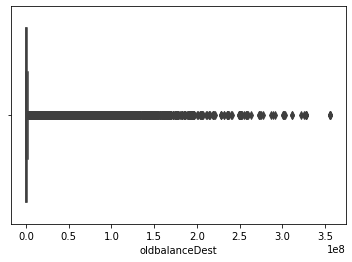

In [58]:
sns.boxplot(df['oldbalanceDest'])

[Text(0, 0, '2.1515e+06'),
 Text(0, 0, '532909'),
 Text(0, 0, '2.2375e+06'),
 Text(0, 0, '41432'),
 Text(0, 0, '1.39928e+06')]

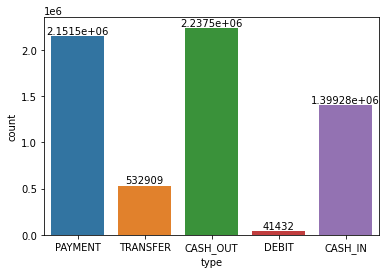

In [59]:
ax = sns.countplot(x='type',data=df)
ax.bar_label(ax.containers[0])

In [60]:
X = df.drop(['isFraud','type'],axis=1)
y = df['isFraud']

In [61]:
type = df['type']
df = df.drop("type" , axis=1)

In [62]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,encoded
0,9839.64,170136.0,160296.36,0.0,0.0,0,3
1,1864.28,21249.0,19384.72,0.0,0.0,0,3
2,181.00,181.0,0.00,0.0,0.0,1,4
3,181.00,181.0,0.00,21182.0,0.0,1,1
4,11668.14,41554.0,29885.86,0.0,0.0,0,3


Calculating the vif score and seeing the heatmap figure out the multi-collinearity:-

1) newbalanceOrig & oldbalanceOrg
2) newbalanceDest & oldbalanceDest


In [63]:
import statsmodels.api as sm
names = list(df.columns)
for index in range(0, len(names)):
    y = df.loc[:, df.columns == names[index]]
    x = df.loc[:, df.columns != names[index]]
    model = sm.OLS(y,  x)                 
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print("R Square value of {} column is {} keeping all other columns as independent features".format(names[index], (round(rsq, 2))))
    print("Variance Inflation Factor of {} column is {} n".format(names[index], vif))

R Square value of amount column is 0.75 keeping all other columns as independent features
Variance Inflation Factor of amount column is 4.03 n
R Square value of oldbalanceOrg column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of oldbalanceOrg column is 546.97 n
R Square value of newbalanceOrig column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of newbalanceOrig column is 548.79 n
R Square value of oldbalanceDest column is 0.99 keeping all other columns as independent features
Variance Inflation Factor of oldbalanceDest column is 71.84 n
R Square value of newbalanceDest column is 0.99 keeping all other columns as independent features
Variance Inflation Factor of newbalanceDest column is 83.71 n
R Square value of isFraud column is 0.16 keeping all other columns as independent features
Variance Inflation Factor of isFraud column is 1.18 n
R Square value of encoded column is 0.09 keeping all other columns as inde

<AxesSubplot:>

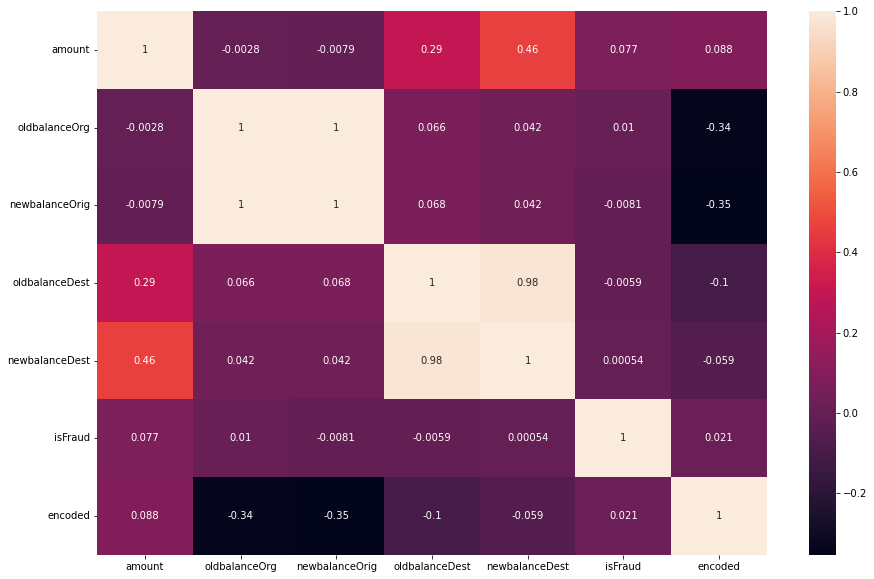

In [64]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, data=df, annot=True)

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
X_resampled, y_resampled = sm.fit_resample(X, y)


Since dataset was found to be imbalanced so I have done SMOTE (Synthetic Minority Oversampling Technique) algorithm to make the data unbiased. 



In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

As mentioned before there is a problem of multicollinearity in the dataset. So I'll use PCA to perform feature extraction and remove multicollinearity from the dataset



In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components = X_train_std.shape[1])
df_pca = pca.fit_transform(X_train_std)
p = pca.explained_variance_/(np.sum(pca.explained_variance_))
# cumm_var_explained = np.cumsum(p)


In [68]:
pca = PCA(n_components = 3)
df_pca = pca.fit_transform(X_train_std)
fraud_test_data_pca = pca.transform(X_test_std)

In [69]:
fraud_data_pca = pd.DataFrame(df_pca)
fraud_data_pca['isFraud'] = y_train
fraud_data_pca.head()

,0,1,2,isFraud
0,-0.801882,0.041982,0.524787,3.0
1,0.420757,0.573515,-0.692305,3.0
2,6.225822,-4.972924,1.628693,NaN
3,-0.406615,-0.213503,-0.432838,1.0
4,-0.216405,0.047583,-0.438248,NaN


In [70]:
from xgboost import XGBClassifier
# print("1")
xgb = XGBClassifier()
# print("3")
xgb.fit(df_pca, y_train, eval_metric='aucpr')
# print("2")
y_train_pred = xgb.predict(df_pca)
y_test_pred = xgb.predict(fraud_test_data_pca)

/Users/akshatgarg/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [71]:
from sklearn.metrics import accuracy_score

print('Training accuracy: ',accuracy_score(y_train_pred,y_train))


print('Testing accuracy: ',accuracy_score(y_test_pred,y_test))

Training accuracy:  0.9995796879722055
Testing accuracy:  0.9994829174145242


# FINAL ANSWERS

1) There were no missing values but I have checked the multi-collinearity using the VIF and HeatMap, The outlier testing in also done on oldbalanceDest

2) XGBoost:- XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It uses Gradient boosting technique. XGBoost provides a parallel tree boosting.

3) There is no point in including the names as fraud cannot depend on it.The "isFlaggedFraud" is not needed as we have the isfraud field. Thirdly the step feild is also irrelevant.

4) Performance:- Testing accuracy :- 99.94 and Training accuracy:- 99.950

5)The key factor is to to do the PCA part to evaluate the multi-collinearity part and preform it appropriately. The next thing is to do the standard scalar normalization.

6) Some of the factors like the step and customer names doesnot make sense but others and perfectly fine

7) The company should focus on the unbaised data and work on increasing the data cap. We can also build a federated learning model and do dynamic training so that the model evaluates better.

8) The actions will work as we have perfectly done the dataprocessing and data cleaning part and hence the same format data will always work